In [ ]:
! pip install transformers
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00


In [ ]:
from datasets import list_datasets

In [ ]:
from datasets import load_dataset
emotions = load_dataset("emotion")


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
import pandas as pd


In [ ]:
emotions.set_format(type="pandas")

df = emotions["train"][:]
df


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [ ]:
def label_int2str(row, split):
    return emotions[split].features["label"].int2str(row)



In [ ]:
df["label_name"] = df["label"].apply(label_int2str, split="train")
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [ ]:
from transformers import AutoTokenizer
model_name = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.special_tokens_map


{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [ ]:
encoded_str = tokenizer.encode("this is a complecatedtest")

In [ ]:
encoded_str



[101, 2023, 2003, 1037, 4012, 10814, 12921, 22199, 102]

In [ ]:
import torch
input_ids = torch.tensor(encoded_str)
one_hot_encodings = torch.nn.functional.one_hot(input_ids)
one_hot_encodings.shape


torch.Size([9, 22200])

In [ ]:
for token in encoded_str:
    print(token, tokenizer.decode([token]))

101 [CLS]
2023 this
2003 is
1037 a
4012 com
10814 ##ple
12921 ##cated
22199 ##test
102 [SEP]


In [ ]:
from transformers import AutoModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_name).to(device)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
text = "this is a test"


In [ ]:
text_tensor = tokenizer.encode(text, return_tensors="pt").to(device)

In [ ]:
text_tensor.shape

torch.Size([1, 6])

In [ ]:
output = model(text_tensor)
output.last_hidden_state.shape #[batch size, n tokens, hidden dim]

torch.Size([1, 6, 768])

In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"],padding=True, truncation=True)



In [ ]:
emotions.reset_format()

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
tokenize(emotions["train"][:3])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [ ]:
emotions["train"][:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3]}

In [ ]:
emotions_encoded  = emotions.map(tokenize, batched = True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_encoded["train"]['input_ids']

[[101,
  1045,
  2134,
  2102,
  2514,
  26608,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  1045,
  2064,
  2175,
  2013,
  3110,
  2061,
  20625,
  2000,
  2061,
  9636,
  17772,
  2074,
  2013,
  2108,
  2105,
  2619,
  2040,
  14977,
  1998,
  2003,
  8300,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  10047,
  9775,
  1037,
  3371

In [ ]:
import numpy as np



In [ ]:
def forward_pass(batch):
    input_ids = torch.tensor(batch["input_ids"]).to(device)

    attention_mask = torch.tensor(batch["attention_mask"]).to(device)

    with torch.no_grad():
        last_hidden_state = model(input_ids, attention_mask).last_hidden_state

        last_hidden_state = last_hidden_state.cpu().numpy()


    lhs_shape = last_hidden_state.shape

    boolean_mask = np.array(batch["attention_mask"]).astype(bool)\

    boolean_mask = np.repeat(boolean_mask, lhs_shape[-1], axis =-1)

    boolean_mask = boolean_mask.reshape(lhs_shape)

    masked_mean = np.ma.array(last_hidden_state, mask=boolean_mask).mean(axis=1)
    batch["hidden_state"] = masked_mean.data
    return batch


emotions_encoded = emotions_encoded.map(forward_pass, batched=True, batch_size=16)


  # something left

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

np.re

In [ ]:
import numpy as np
X_train = np.array(emotions_encoded["train"]["hidden_state"])
X_valid = np.array(emotions_encoded["validation"]["hidden_state"])
y_train = np.array(emotions_encoded["train"]["label"])
y_valid = np.array(emotions_encoded["validation"]["label"])

In [ ]:
y_train

array([0, 0, 3, ..., 1, 3, 0])

In [ ]:
! pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=549dc7d23f7a9fb9c38af16087c9f8a74f43ec0a905f0a03dbc342f66955c361
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=6785c640c1185979ddbecd1974c3f270fe748be8380fb3e6bfa56bd93b88668c
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
from umap import UMAP


In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns=['X','Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,1.800010,4.854276,0
1,1.768328,3.812992,0
2,3.043769,3.435515,3
3,2.665130,0.184887,2
4,1.017386,5.573906,3


In [ ]:
import matplotlib.pyplot as plt
labels = [0,1,2,3,4,5]


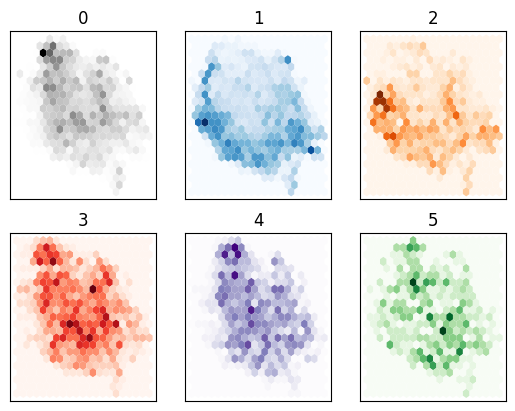

In [ ]:
fig, axes = plt.subplots(2,3)
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds","Purples", "Greens"]
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
  gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_valid, y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6365

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy.score(X_valid, y_valid)


0.352

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_preds = lr.predict(X_valid)
cm = confusion_matrix(y_valid, y_preds,normalize="true")
dis = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels= labels)

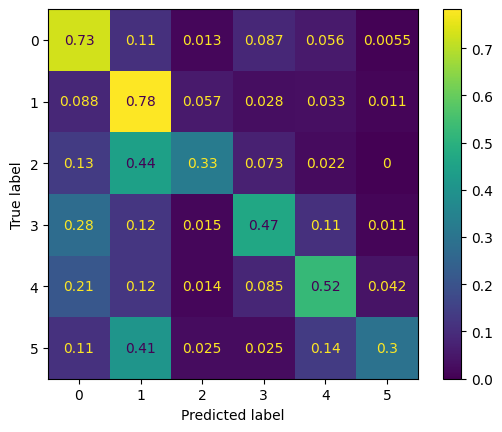

In [ ]:
dis.plot()

In [ ]:
labels =["sadness","joy", "love","anger","feat","suprise"]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_preds, target_names = labels))

              precision    recall  f1-score   support

     sadness       0.65      0.73      0.69       550
         joy       0.70      0.78      0.74       704
        love       0.51      0.33      0.40       178
       anger       0.56      0.47      0.51       275
        feat       0.53      0.52      0.53       212
     suprise       0.51      0.30      0.37        81

    accuracy                           0.64      2000
   macro avg       0.58      0.52      0.54      2000
weighted avg       0.63      0.64      0.63      2000

